In [1]:
import numpy as np
import matplotlib.pyplot as plt

## First task

The task is to create a custom probability distribution using two (i) inverse cumulative distribution and (ii) Monte-Carlo methods.

The custom probability distribution we create is 

\begin{equation}
P(X) = \frac{3}{2} \sqrt{1-X}
\end{equation}
with $X\in\{0,1\}$

In [2]:
def P_x(): #probability distribution using the inverse cumulative distribution method
    D = np.random.random() #random number with uniform distribution
    return 1-(1-D)**(2/3) #express the random number X with the inverse of 

In [3]:
test1 = []
sample_size = int(1e6)
for i in range(sample_size):
    test1.append(P_x())

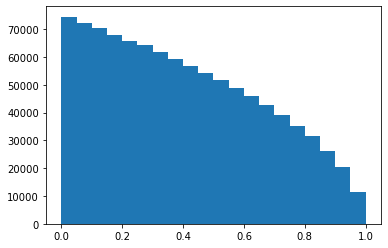

In [4]:
fig = plt.figure()
plt.hist(test1, bins = 20);

In [5]:
def xypx(): #auxiliary function for the monte-carlo method
    x = np.random.random() #create the random x coordinate
    y = np.random.random()*(3/2) #create the random y coordinate
    px= 3*np.sqrt(1-x)/2 #evaluate the probability density function we want to create
    return x,y,px

def P_x_MC(): #monte carlo method to create the probability density function
    #method described by the lecture notes
    x,y,px = xypx() 
    while px<y: 
        x,y,px = xypx()
    return y

In [6]:
test2 = []
sample_size = int(1e6)
for i in range(sample_size):
    test2.append(P_x_MC())

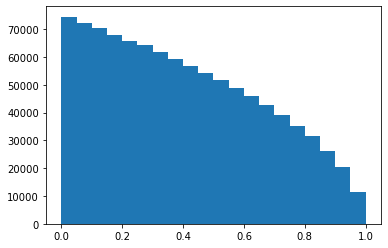

In [7]:
fig = plt.figure()
plt.hist(test1, bins = 20);

## Second task

The task is the write a code that shuffles a deck of cards and make sure that the shuffled deck is indeed random. This should be also checked with some code.

In [8]:
def shuffle1(current_deck): #first method to shuffle the deck
    n = len(current_deck) #get the size of the deck
    new_order = np.random.choice(np.arange(n),size = n, replace = False) #&reate a new ordering for the elements in the deck
    new_deck = np.zeros(n)
    for i in range(n):
        new_deck[new_order[i]] = current_deck[i]
    return new_deck

In [9]:
def shuffle2(current_deck): #second method to shuffle a deck. Idea got from geeks and geeks
    n = len(current_deck) #get the size of the deck
    new_deck = current_deck.copy() #create a copy of the original deck
    
    for i in range(n): #iterate through the deck
        j = i + np.random.randint(n-i) #for every card indexed by i choose another random card with i<=j 
        temporary = new_deck[i] #exchange cards with index i and j
        new_deck[i] = new_deck[j]
        new_deck[j] = temporary
        #it can be analytically proven that this method yields a uniform distribution for the cards
    return new_deck

In [10]:
def randomness_checker(current_deck, iter_num, method = 2):
    n = len(current_deck)
    randomness_matrix = np.array([np.zeros(n) for i in range(n)], dtype = float) #n*n numbers used to describe the prob. distribution
                                                                                 #of the cards in the deck
    for i in range(iter_num):
        if method == 1: #using the shuffle1 function
            new_deck = shuffle1(current_deck) #shuffle the deck with the first implemented method
        elif method == 2:
            new_deck = shuffle2(current_deck) #shuffle the dekc with the second implemented method
        else:
            print("Incorrect method type was given!")
            return
        #update the elements of the randomness_matrix which describe the probability distribution of the cards in the deck
        for k in range(n): #iterating through the cards themselves
            randomness_matrix[k,np.where(new_deck==k)] += 1/iter_num 
    
    return randomness_matrix

In [11]:
n_test = 5
test_deck = np.arange(n_test)

In [12]:
rm = randomness_checker(current_deck = test_deck, iter_num = 40000, method = 1)
print(rm)

[[0.19915  0.199975 0.2002   0.1991   0.201575]
 [0.2003   0.19895  0.203225 0.1968   0.200725]
 [0.2013   0.197925 0.1988   0.20235  0.199625]
 [0.202425 0.20055  0.1953   0.199875 0.20185 ]
 [0.196825 0.2026   0.202475 0.201875 0.196225]]


### We found that both shuffling method gives uniform distribution of the cards

## Third task